In [1]:
# 加载扩展包
import numpy as np 
import pandas as pd 
from IPython.display import display, HTML
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context(font_scale=2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [2]:
# 读取相关特征和标签文件
trees = pd.read_csv("./dtrain-features.csv")
labels = pd.read_csv('./data/train-output.csv')
trees['label'] = labels.iloc[:, 1]
trees = trees.iloc[:, 1:]
print("dataset shape: ", trees.shape)

FileNotFoundError: [Errno 2] No such file or directory: './data/train-features.csv'

In [ ]:
display(HTML(trees.head(15).to_html()))

In [ ]:
display(pd.DataFrame.info(trees))
print( 'Null values? :' , trees.isna().any().any())

In [ ]:
display(trees.describe())

In [ ]:
def find_outlier_IQR(df, col_name):
    # 使用IQR 剔除超边界的数据
    Q1=np.percentile(np.array(df[col_name].tolist()), 25)
    Q3=np.percentile(np.array(df[col_name].tolist()), 75)
    IQR=Q3-Q1
    UL= Q3 + (3*IQR)
    LL= Q1 - (3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < LL) | (value > UL):
            outlier_count +=1

    return LL, UL, outlier_count


for column in trees[['feature_0', 'feature_1', 'feature_2',
                    'feature_3', 'feature_4', 'feature_5',
                    'feature_9']]:
    a,b,c =find_outlier_IQR(trees, column)
    if c > 0:
        print("There are {} outliers in {}. The normal range is {} - {}. ".format(c, column, a, b))

In [ ]:
# 去除上面分析中存在较多问题的值
trees = trees[(trees['feature_3'] > find_outlier_IQR(trees, 'feature_3')[0]) & 
                (trees['feature_3'] < find_outlier_IQR(trees, 'feature_3')[1])&
                (trees['feature_4'] > find_outlier_IQR(trees, 'feature_4')[0]) & 
                (trees['feature_4'] < find_outlier_IQR(trees, 'feature_4')[1])]
print(trees.shape)

In [ ]:
# 虽然剔除之后仍存在一些问题，但并不影响，以为剔除之后分布变了。
for column in trees[['feature_3', 'feature_4', 'feature_5', 'feature_9']]:
    a,b,c =find_outlier_IQR(trees, column)
    if c > 0:
        print("There are {} outliers in {}. The normal range is {} - {}. ".format(c, column, a, b))

In [3]:
cont_vars = trees.loc[:,'feature_0':'feature_9']
cont_vars_vis = cont_vars.copy()
cont_vars_vis['label'] = trees['label'] 
soiltype = trees.loc[:,'feature_14':'feature_53']
soiltype_vis = soiltype.copy()
soiltype_vis['label'] = trees['label'] 
wilderness = trees.loc[:,'feature_10':'feature_13']
wilderness_vis = wilderness.copy()
wilderness_vis['label'] = trees['label'] 
print(wilderness.shape)
print(soiltype.shape)
print(cont_vars.shape)

NameError: name 'trees' is not defined

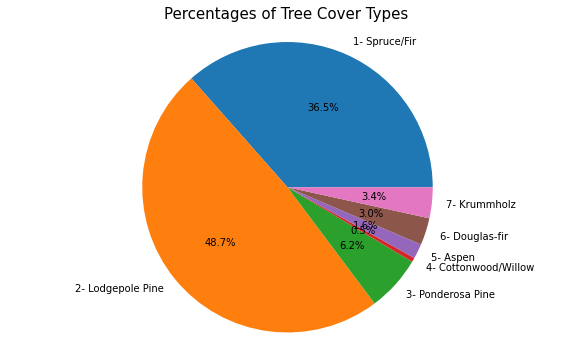

In [10]:
# 绘制饼状图
labels= '1- Spruce/Fir', '2- Lodgepole Pine', '3- Ponderosa Pine', '4- Cottonwood/Willow', '5- Aspen', '6- Douglas-fir', '7- Krummholz'
trees_dist = trees.groupby('label').size()
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,6)
ax1.pie(trees_dist, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Percentages of Tree Cover Types',fontsize=15)
plt.show()

feature_0     -0.841298
feature_1      0.406682
feature_2      0.789710
feature_3      1.068936
feature_4      1.261183
                ...    
feature_50    41.824149
feature_51     5.840679
feature_52     6.254699
feature_53     8.573345
label          2.278424
Length: 55, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'feature_0'),
  Text(1, 0, 'feature_1'),
  Text(2, 0, 'feature_2'),
  Text(3, 0, 'feature_3'),
  Text(4, 0, 'feature_4'),
  Text(5, 0, 'feature_5'),
  Text(6, 0, 'feature_6'),
  Text(7, 0, 'feature_7'),
  Text(8, 0, 'feature_8'),
  Text(9, 0, 'feature_9'),
  Text(10, 0, 'feature_10'),
  Text(11, 0, 'feature_11'),
  Text(12, 0, 'feature_12'),
  Text(13, 0, 'feature_13'),
  Text(14, 0, 'feature_14'),
  Text(15, 0, 'feature_15'),
  Text(16, 0, 'feature_16'),
  Text(17, 0, 'feature_17'),
  Text(18, 0, 'feature_18'),
  Text(19, 0, 'feature_19'),
  Text(20, 0, 'feature_20'),
  Text(21, 0, 'feature_21'),
  Text(22, 0, 'feature_22'),
  Text(23, 0, 'feature_23'),
  Text(24, 0, 'feature_24'),
  Text(25, 0, 'feature_25'),
  Text(26, 0

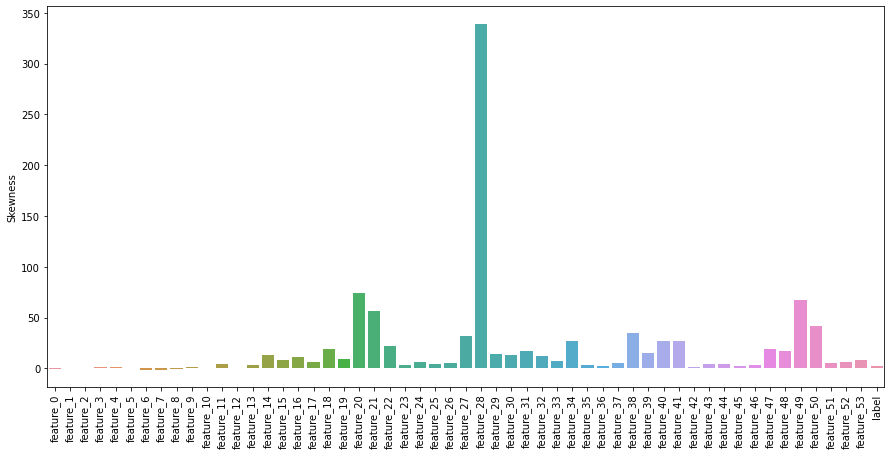

In [12]:
skew = trees.skew()
display(skew)
skew =pd.DataFrame(skew,index=None,columns=['Skewness'])

plt.figure(figsize=(15,7))
sns.barplot(x=skew.index,y=skew.Skewness)
plt.xticks(rotation=90)

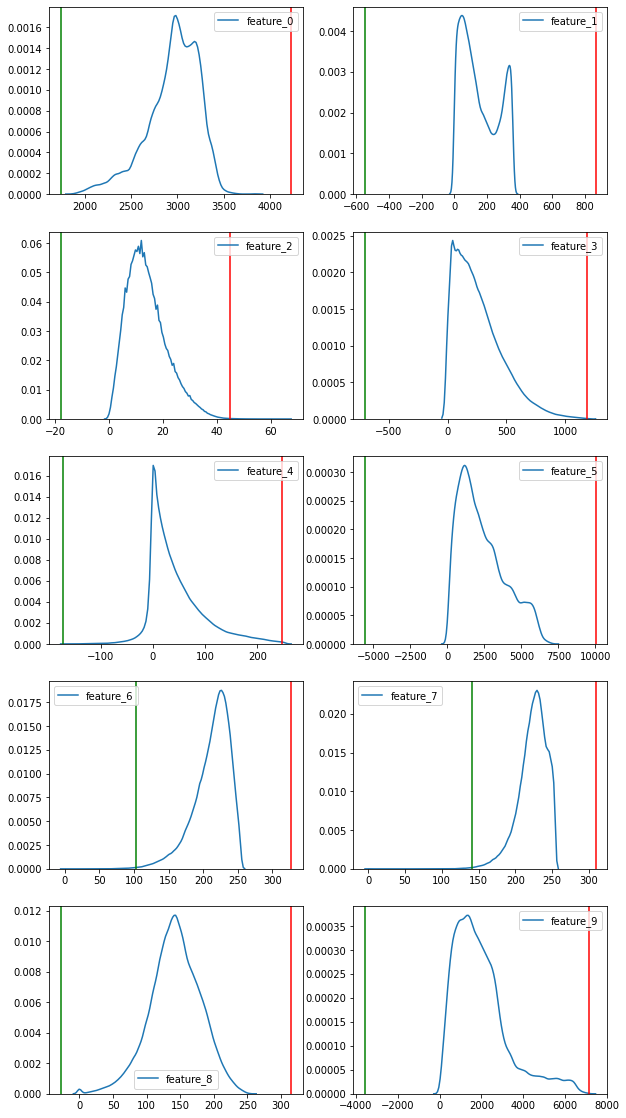

In [14]:
plt.figure(figsize=(10, 20))
for i,col in enumerate(cont_vars.columns.values):
    l,u,ct = find_outlier_IQR(cont_vars_vis,col)
    plt.subplot(5,2,i+1)
    sns.kdeplot(cont_vars[col])
    plt.axvline(x=l, color = 'g')
    plt.axvline(x=u, color = 'r')
    
plt.show()

In [15]:
corr = trees.corr()['label']
corr = pd.DataFrame(data =corr)
corr = corr.rename({'label': 'Correlation'}, axis = 1)
print(corr.head())

           Correlation
feature_0    -0.281931
feature_1     0.014608
feature_2     0.150642
feature_3    -0.032199
feature_4     0.079903


<AxesSubplot:>

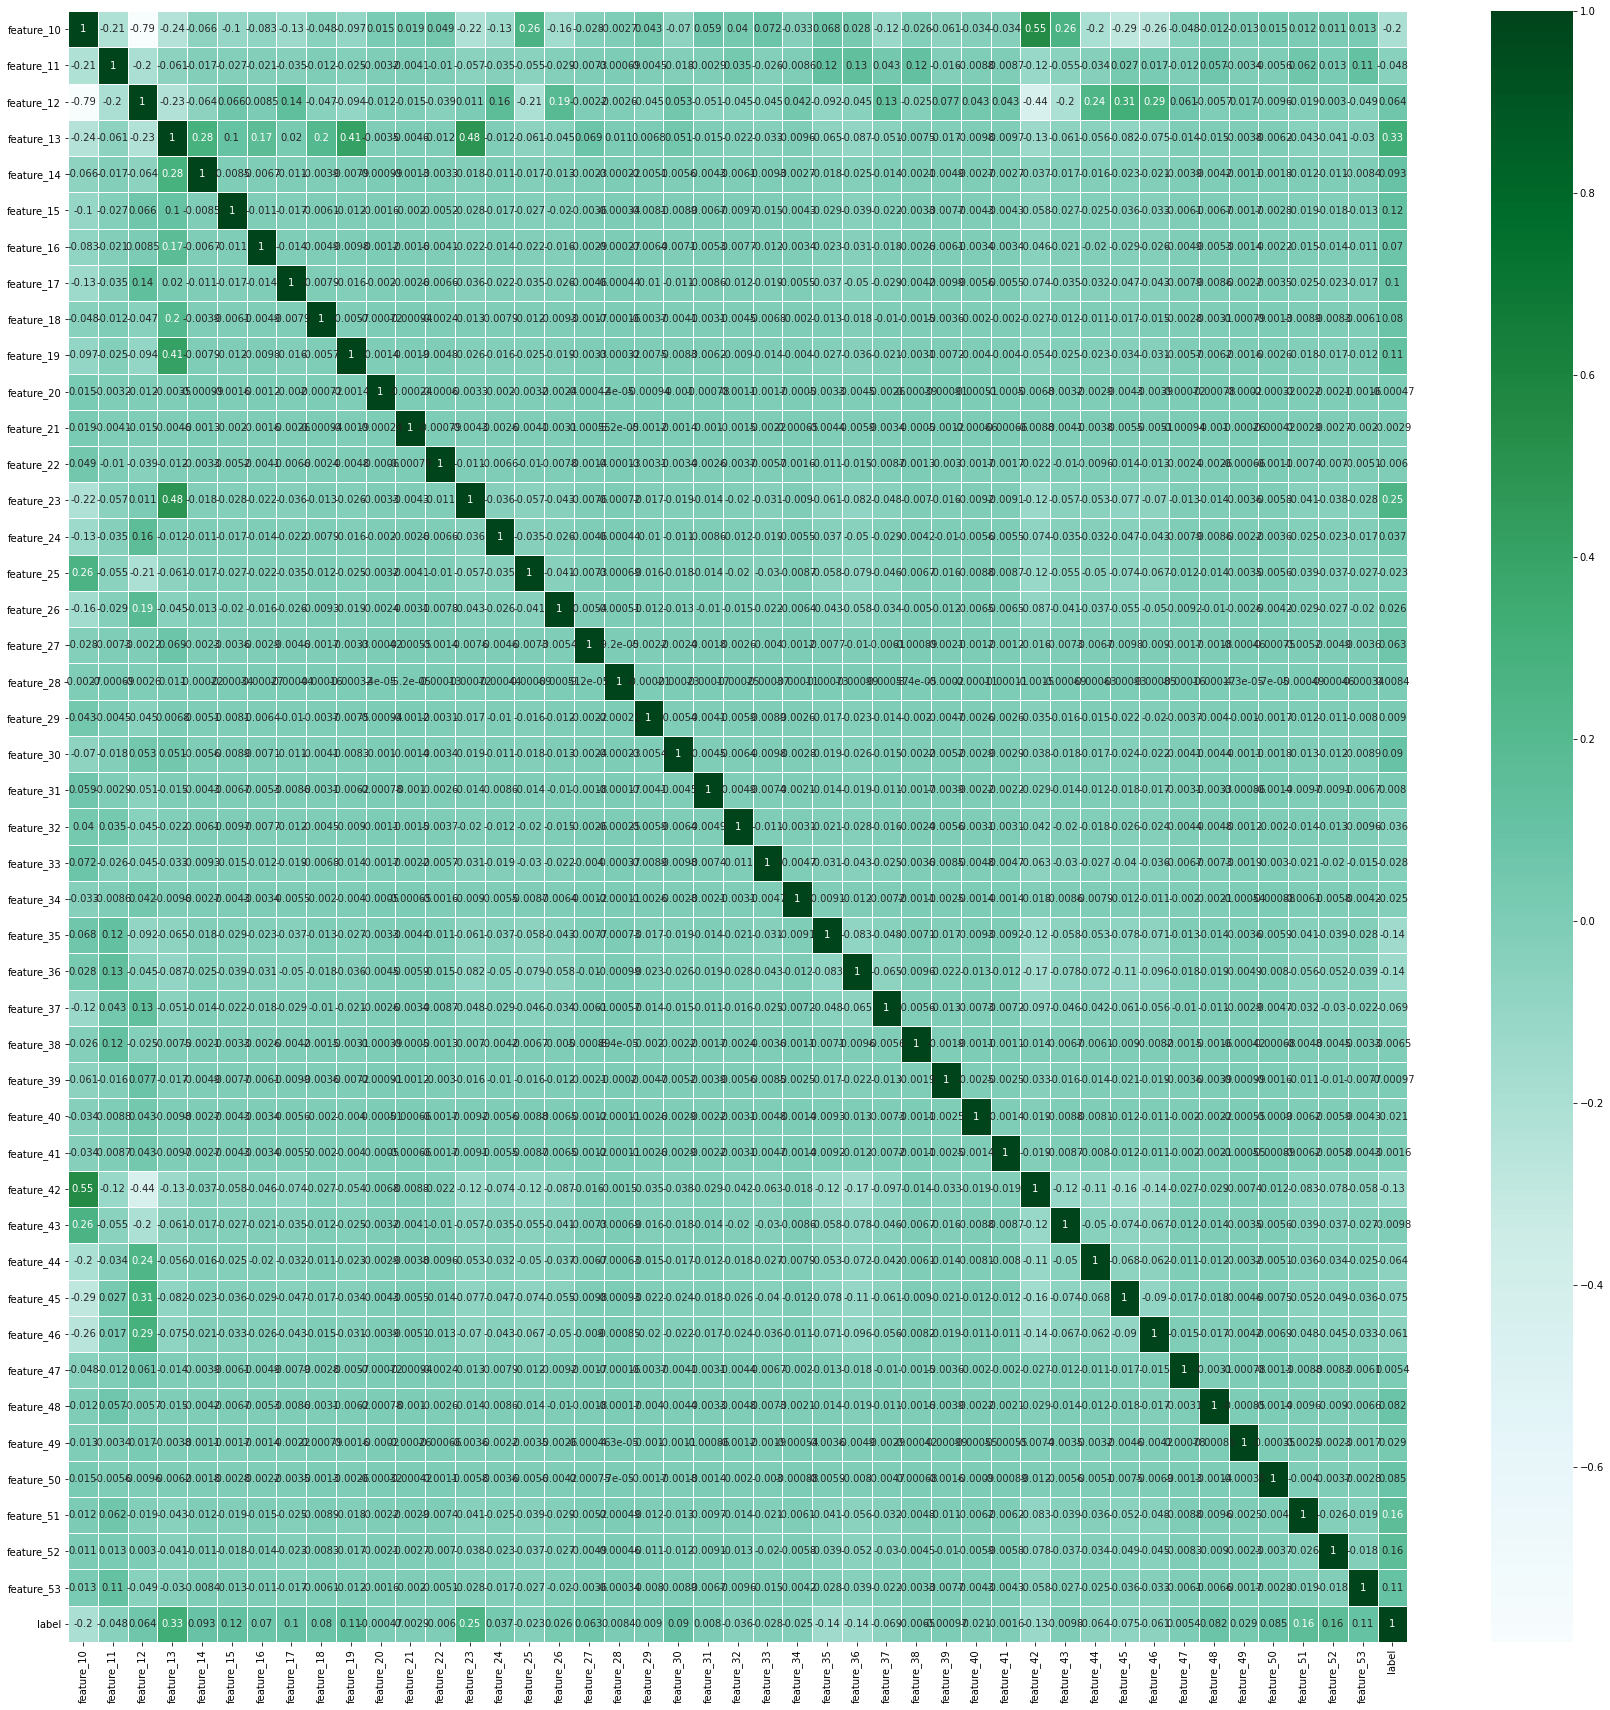

In [16]:
plt.figure(figsize=(30,30))
disc = trees.drop(trees.columns[0:10], axis=1)
sns.heatmap(disc.corr(),cmap='BuGn',linecolor='white',linewidths=1,annot=True, xticklabels = True, yticklabels= True)

In [17]:
acc =[]
algs = []
trees_training = trees.drop('label', axis=1)
labels_training = trees["label"]
train, test, train_labels, test_labels = train_test_split(trees_training, labels_training, test_size=0.1, random_state=1)

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(train, train_labels)
dectree_pred = dtree.predict(test)
dtree_accuracy = accuracy_score(dectree_pred , test_labels)
dtree_f1_score = f1_score(dectree_pred , test_labels, average='micro')
acc.append(dtree_accuracy)
feat_dt = dtree.feature_importances_

algs.append('Decision Tree')
print("Our decision tree classified {:0.2f}% of the of the trees correctly".format(dtree_accuracy*100))
print("Our decision tree classified {:0.2f}% of the of the trees f1 score".format(dtree_f1_score*100))

Our decision tree classified 92.50% of the of the trees correctly
Our decision tree classified 92.50% of the of the trees f1 score


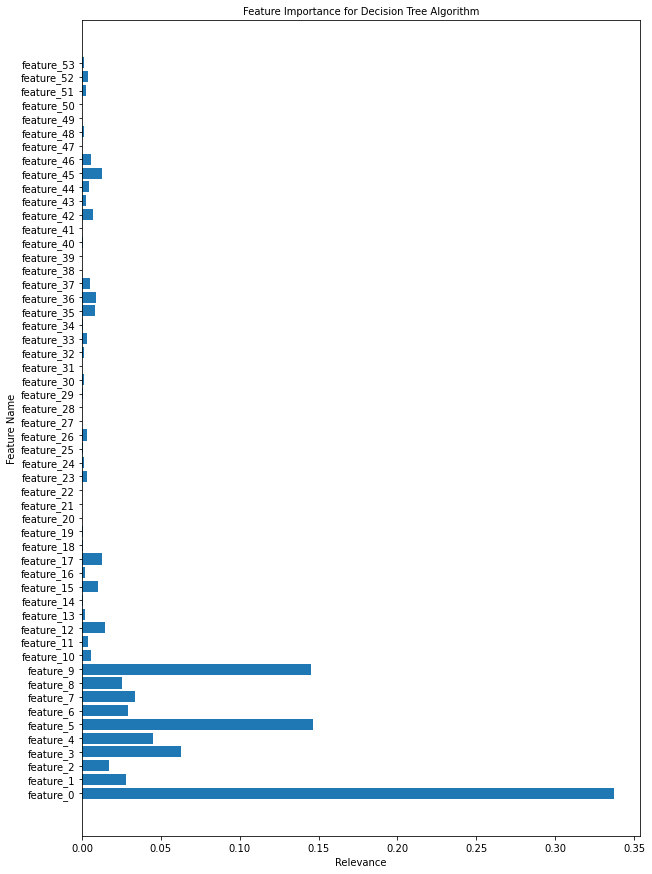

In [19]:
plt.figure(figsize=(10,15))
plt.barh(train.columns.values, feat_dt)
plt.title('Feature Importance for Decision Tree Algorithm',fontsize=10)
plt.ylabel('Feature Name')
plt.xlabel('Relevance')
plt.show()

In [20]:
rf = RandomForestClassifier()
rf.fit(train, train_labels)
rf_pred = rf.predict(test)
rf_acc = accuracy_score(rf_pred , test_labels)
rf_f1 = f1_score(rf_pred , test_labels, average='micro')
acc.append(rf_acc)
algs.append('Random Forest')
feat_rf = rf.feature_importances_
print("Our random forest classified {:0.2f}% of the of the trees correctly".format(rf_acc*100))
print("Our random forest classified {:0.2f}% of the of the trees f1 score".format(rf_f1*100))

Our random forest classified 94.53% of the of the trees correctly
Our random forest classified 94.53% of the of the trees f1 score


In [21]:
# 特征选择
def reverse_encode(relevant_subset):

    num_list =[]
    for i in relevant_subset.iloc:
        ix = 1
        for j in i:
            if j ==1:
                num_list.append(ix)
            else: 
                ix +=1
                
    print('The new list has the following elements: ' + str(set(num_list)))
    if relevant_subset.shape[0] == len(num_list):
        return num_list
    else: print('Error in compiling list: lengths of the two lists do not match.')


w = reverse_encode(wilderness)
print(len(w))

The new list has the following elements: {1, 2, 3, 4}
345192


In [22]:
s = reverse_encode(soiltype)
print(len(s))

The new list has the following elements: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}
345192


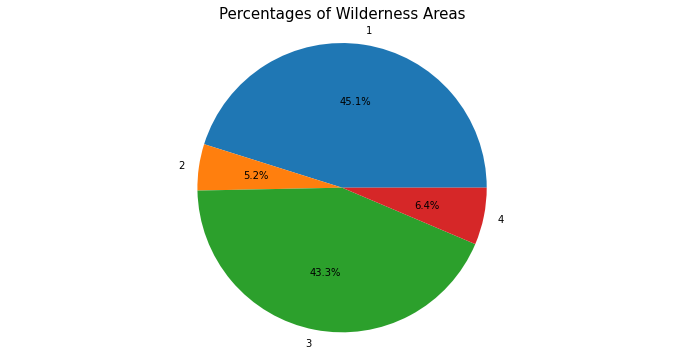

In [23]:
lab =list(range(1,5))

w = pd.DataFrame(w, columns=['Wilderness'])
wild_dist = w.groupby('Wilderness').size()
fig1, ax1 = plt.subplots()
fig1.set_size_inches(12,6)
ax1.pie(wild_dist, labels= lab, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Percentages of Wilderness Areas',fontsize=15)
plt.show()

In [24]:
s = pd.DataFrame(s,columns= ['Soil'] )
soil_dist = s.groupby('Soil').size()
print('Soil type with percentage of total')
print((soil_dist/sum(soil_dist))*100)

Soil type with percentage of total
Soil
1     0.534195
2     1.313472
3     0.835187
4     2.152136
5     0.283031
        ...   
36    0.021727
37    0.057070
38    2.696470
39    2.375490
40    1.307388
Length: 40, dtype: float64


In [25]:
trees_num = trees.loc[:,'feature_0':'feature_9']
trees_num['Wilderness']  = w.values
trees_num['Soil']  = s.values
trees_num['Cover'] = trees["label"]
corr = trees_num.corr()['Cover']
corr = pd.DataFrame(data =corr)
corr = corr.rename({'Cover': 'Correlation'}, axis = 1)
print( 'Null values? :' , trees_num.isna().any().any())
print(corr.head())

Null values? : False
           Correlation
feature_0    -0.281931
feature_1     0.014608
feature_2     0.150642
feature_3    -0.032199
feature_4     0.079903


<ipython-input-25-3970d33723bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_num['Wilderness']  = w.values
<ipython-input-25-3970d33723bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_num['Soil']  = s.values
<ipython-input-25-3970d33723bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [26]:
trees_tr = trees_num.drop('Cover', axis = 1)
labels_tr = trees_num['Cover']

train, test, train_labels, test_labels = train_test_split(trees_tr, labels_training, test_size=0.1, random_state=1)
rf = RandomForestClassifier()
rf.fit(train, train_labels)
rf_pred = rf.predict(test)
rf_acc = accuracy_score(rf_pred , test_labels)
feat_rf = rf.feature_importances_
print("Our random forest classified {:0.2f}% of the of the trees correctly".format(rf_acc*100))

Our random forest classified 95.48% of the of the trees correctly


In [27]:
df = trees_num.copy()
df['euc_dis2h'] = (trees_num['feature_3']**2 + trees_num['feature_4']**2)**0.5
df['lc_firepoint'] = 0.5*(trees_num['feature_5'] + trees_num['feature_9'])
df['lc_hor_roadway'] = 0.5*(trees_num['feature_5'] + trees_num['feature_3'])
df['LC_hor_r_ver_hydr'] = 0.5*(trees_num['feature_5'] + trees_num['feature_4'])

# Sqrt columns
df['sqrt_Elevation'] =(trees_num['feature_0'])**0.5
df['sqrt_hor_hydr'] =(trees_num['feature_3'])**0.5
df['sqrt_hor_dis'] =(trees_num['feature_5'])**0.5
df['sqrt_hor_fire'] =(trees_num['feature_9'])**0.5
df['sqrt_euc_dis2h'] = (df['euc_dis2h'])**0.5

# Normalize Hillshade & drop the Hillshade_3pm
df = df.drop(['feature_8'], axis = 1)
df['norm_hill_noon'] = df['feature_7']/254
df['norm_hill_9'] = df['feature_6']/254
df['norm_aspect'] = df['feature_1']/360

#print(df[~df.isin([np.nan, np.inf, -np.inf]).any(1)])

print( 'Null values? :' , df.isna().any().any())


corr = df.corr()['Cover']
corr = pd.DataFrame(data =corr)
corr = corr.rename({'Cover': 'Correlation'}, axis = 1)
corr_vis = corr.abs()
print(corr_vis.sort_values(by = 'Correlation'))

Null values? : False
                   Correlation
norm_aspect           0.014608
feature_1             0.014608
euc_dis2h             0.026095
feature_3             0.032199
sqrt_euc_dis2h        0.032230
norm_hill_9           0.033708
feature_6             0.033708
sqrt_hor_hydr         0.038483
feature_4             0.079903
norm_hill_noon        0.096885
feature_7             0.096885
feature_9             0.113215
sqrt_hor_fire         0.123390
feature_2             0.150642
LC_hor_r_ver_hydr     0.158722
feature_5             0.161244
lc_hor_roadway        0.162563
sqrt_hor_dis          0.169254
lc_firepoint          0.170359
Soil                  0.171862
Wilderness            0.275446
feature_0             0.281931
sqrt_Elevation        0.292275
Cover                 1.000000


In [28]:
print('Nan values?: '+str(np.any(np.isnan(df))))
print('No inf values?: '+str(np.all(np.isfinite(df))))
display(pd.DataFrame.describe(df))
display(pd.DataFrame.info(df))

Nan values?: False
No inf values?: True


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_9,Wilderness,Soil,Cover,euc_dis2h,lc_firepoint,lc_hor_roadway,LC_hor_r_ver_hydr,sqrt_Elevation,sqrt_hor_hydr,sqrt_hor_dis,sqrt_hor_fire,sqrt_euc_dis2h,norm_hill_noon,norm_hill_9,norm_aspect
count,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000,345192.000000
mean,2957.523963,155.475330,14.059541,264.273978,44.005432,2351.807429,212.310459,223.352783,1982.990310,2.109226,24.299065,2.047959,270.406691,2167.398869,1308.040703,1197.906430,54.319405,14.817225,45.599033,42.146970,14.996950,0.879342,0.835868,0.431876
std,279.183108,111.818563,7.468336,205.484569,52.435096,1560.466763,26.573652,19.771161,1327.259503,1.061894,9.479128,1.390241,208.879817,1179.517974,794.253036,779.435032,2.631773,6.687597,16.508677,14.374417,6.745243,0.077839,0.104621,0.310607
min,1860.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,30.000000,0.000000,-45.500000,43.127717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2807.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,199.000000,213.000000,1022.000000,1.000000,20.000000,1.000000,108.226614,1275.000000,679.000000,577.000000,52.981129,10.392305,33.256578,31.968735,10.403202,0.838583,0.783465,0.161111
50%,2995.000000,127.000000,13.000000,216.000000,29.000000,1999.000000,218.000000,226.000000,1714.000000,2.000000,29.000000,2.000000,227.059464,1955.000000,1127.500000,1020.500000,54.726593,14.696938,44.710178,41.400483,15.068492,0.889764,0.858268,0.352778
75%,3163.000000,260.000000,18.000000,379.000000,67.000000,3331.000000,231.000000,237.000000,2552.000000,3.000000,31.000000,2.000000,389.801231,2821.000000,1814.500000,1686.500000,56.240555,19.467922,57.714816,50.517324,19.743384,0.933071,0.909449,0.722222
max,3858.000000,360.000000,66.000000,1211.000000,254.000000,7117.000000,254.000000,254.000000,7172.000000,4.000000,40.000000,7.000000,1235.188245,6252.000000,3648.000000,3562.000000,62.112801,34.799425,84.362314,84.687661,35.145245,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 345192 entries, 0 to 348606
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   feature_0          345192 non-null  int64  
 1   feature_1          345192 non-null  int64  
 2   feature_2          345192 non-null  int64  
 3   feature_3          345192 non-null  int64  
 4   feature_4          345192 non-null  int64  
 5   feature_5          345192 non-null  int64  
 6   feature_6          345192 non-null  int64  
 7   feature_7          345192 non-null  int64  
 8   feature_9          345192 non-null  int64  
 9   Wilderness         345192 non-null  int64  
 10  Soil               345192 non-null  int64  
 11  Cover              345192 non-null  int64  
 12  euc_dis2h          345192 non-null  float64
 13  lc_firepoint       345192 non-null  float64
 14  lc_hor_roadway     345192 non-null  float64
 15  LC_hor_r_ver_hydr  345192 non-null  float64
 16  sq

None

In [29]:
trees_tr = df.drop('Cover', axis = 1)
labels_tr = df['Cover']

train, test, train_labels, test_labels = train_test_split(trees_tr, labels_training, test_size=0.1, random_state=1)
rf = RandomForestClassifier()
rf.fit(train, train_labels)
rf_pred = rf.predict(test)
rf_acc = accuracy_score(rf_pred , test_labels)

feat_rf_new = rf.feature_importances_
print("Our random forest classified {:0.2f}% of the of the trees correctly".format(rf_acc*100))

Our random forest classified 96.44% of the of the trees correctly


                    0         1
2           feature_2  0.017310
3           feature_3  0.018036
16      sqrt_hor_hydr  0.018153
7           feature_7  0.020254
6           feature_6  0.021100
20     norm_hill_noon  0.021498
21        norm_hill_9  0.021768
1           feature_1  0.021953
11          euc_dis2h  0.021969
22        norm_aspect  0.022273
19     sqrt_euc_dis2h  0.023199
4           feature_4  0.028307
14  LC_hor_r_ver_hydr  0.038203
9          Wilderness  0.040080
5           feature_5  0.040487
13     lc_hor_roadway  0.040800
17       sqrt_hor_dis  0.041079
18      sqrt_hor_fire  0.053539
8           feature_9  0.053959
12       lc_firepoint  0.066433
10               Soil  0.091594
0           feature_0  0.136517
15     sqrt_Elevation  0.141490


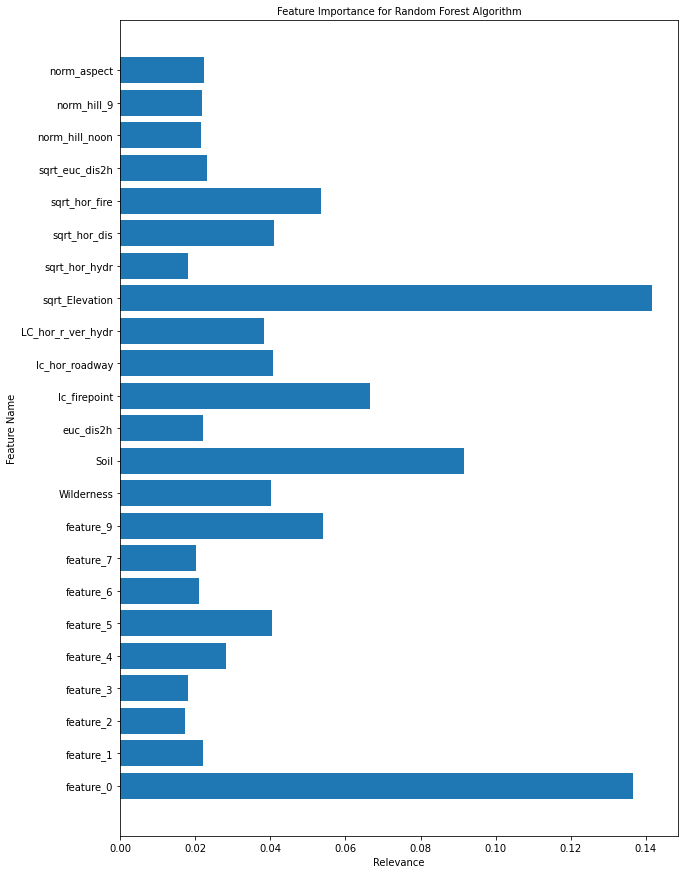

In [30]:
l = pd.DataFrame(zip(train.columns.values,feat_rf_new))
print(l.sort_values(by = 1))
plt.figure(figsize=(10,15))
plt.barh(train.columns.values,feat_rf_new)
plt.title('Feature Importance for Random Forest Algorithm',fontsize=10)
plt.ylabel('Feature Name')
plt.xlabel('Relevance')
plt.show()

In [31]:
df = df.drop([ 'feature_6','feature_7','feature_3', 'sqrt_hor_hydr','euc_dis2h', 'feature_5'  ,'feature_1'], axis = 1)

<AxesSubplot:>

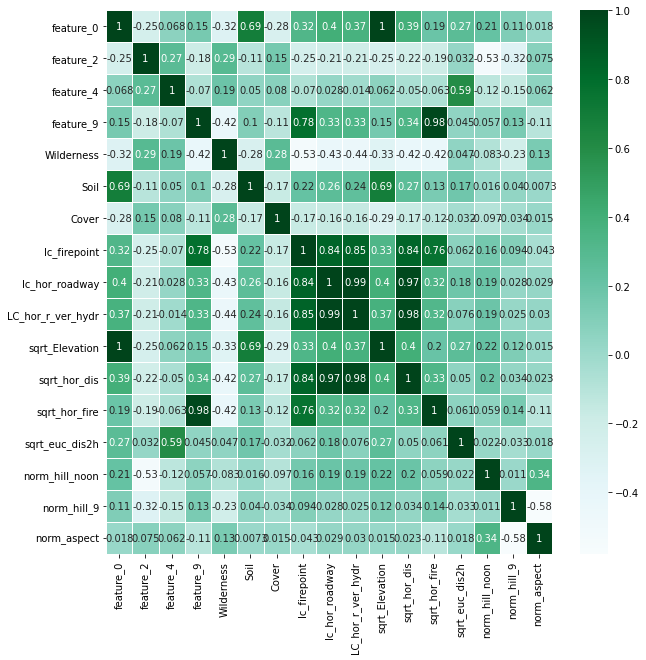

In [32]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),cmap='BuGn',linecolor='white',linewidths=1,annot=True, xticklabels = True, yticklabels= True)

In [33]:
df = df.drop([ 'sqrt_hor_dis','feature_0' ,'feature_9', 'LC_hor_r_ver_hydr' ], axis = 1)
print(df.shape)

(345192, 13)


In [34]:
trees_tr = df.drop('Cover', axis = 1)
labels_tr = df['Cover']

train, test, train_labels, test_labels = train_test_split(trees_tr, labels_training, test_size=0.03, random_state=1)
rf = RandomForestClassifier()
rf.fit(train, train_labels)
rf_pred = rf.predict(test)
rf_acc = accuracy_score(rf_pred , test_labels)

feat_rf_new = rf.feature_importances_
print("Our random forest classified {:0.2f}% of the of the trees correctly".format(rf_acc*100))

Our random forest classified 96.51% of the of the trees correctly


In [35]:
test.shape

(10356, 12)

                 0         1
0        feature_2  0.028491
9   norm_hill_noon  0.039191
10     norm_hill_9  0.039967
11     norm_aspect  0.044092
1        feature_4  0.048171
2       Wilderness  0.051088
8   sqrt_euc_dis2h  0.058286
5   lc_hor_roadway  0.099417
7    sqrt_hor_fire  0.099470
4     lc_firepoint  0.108700
3             Soil  0.133189
6   sqrt_Elevation  0.249937


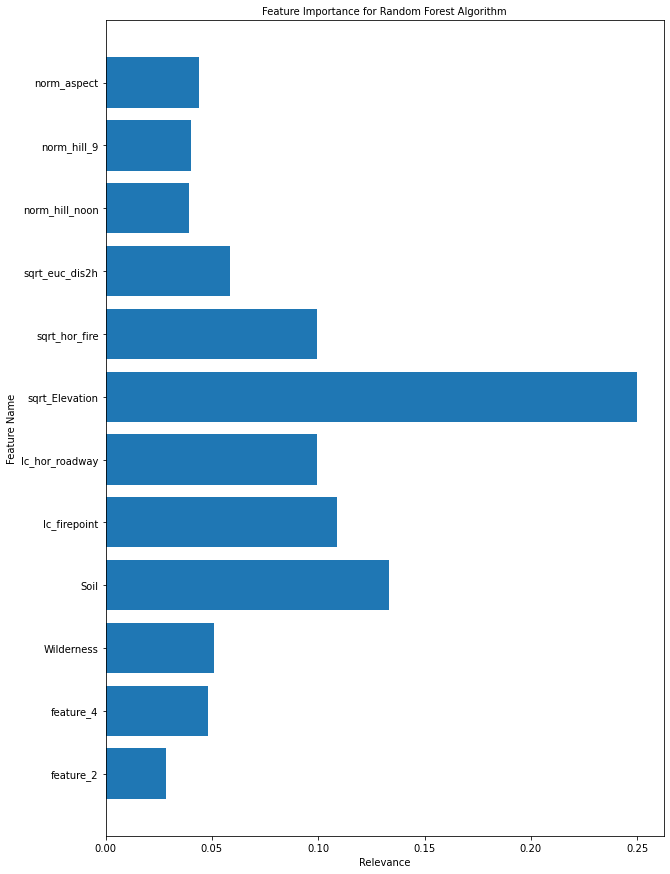

In [36]:
l = pd.DataFrame(zip(train.columns.values,feat_rf_new))
print(l.sort_values(by = 1))
plt.figure(figsize=(10,15))
plt.barh(train.columns.values,feat_rf_new)
plt.title('Feature Importance for Random Forest Algorithm',fontsize=10)
plt.ylabel('Feature Name')
plt.xlabel('Relevance')
plt.show()

In [37]:
test_features = pd.read_csv('./data/test-features.csv')
test_features = test_features.iloc[:, 1:]
test_features.shape
display(test_features)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,...,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53
0,3093,54,11,67,9,4860,226,216,122,2423,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3250,177,4,424,23,4425,222,242,156,2163,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3130,159,9,134,-12,4529,230,242,143,1060,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2409,202,11,30,2,1194,215,250,168,984,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3047,135,17,30,3,3332,244,230,109,2927,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232400,3172,72,5,270,67,2632,225,231,141,1771,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
232401,2996,329,11,595,86,1521,193,227,173,2241,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
232402,2895,15,15,30,7,1851,206,209,138,1332,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
232403,3365,93,9,277,43,1974,235,226,121,3315,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
display(train)

,feature_2,feature_4,Wilderness,Soil,lc_firepoint,lc_hor_roadway,sqrt_Elevation,sqrt_hor_fire,sqrt_euc_dis2h,norm_hill_noon,norm_hill_9,norm_aspect
233837,13,50,1,29,5882.5,3091.0,54.267854,77.717437,21.441247,0.956693,0.728346,0.758333
63540,9,180,3,11,1767.5,953.5,54.396691,49.193496,28.499071,0.870079,0.905512,0.188889
269852,4,0,3,17,1646.0,383.5,52.583267,50.249378,0.000000,0.909449,0.858268,0.063889
153107,7,-1,1,29,2662.5,1492.5,56.700970,48.989795,7.746505,0.952756,0.897638,0.441667
202342,18,14,3,13,1178.0,571.5,54.808758,37.749172,14.576068,0.846457,0.976378,0.294444
...,...,...,...,...,...,...,...,...,...,...,...,...
118744,14,11,3,33,1354.5,1263.5,54.157179,14.560220,5.652706,0.992126,0.791339,0.625000
74065,18,35,3,10,1729.5,1163.5,53.422842,35.482390,11.477569,0.822835,0.968504,0.258333
315320,20,-8,1,29,914.5,272.0,54.598535,36.262929,5.572105,0.842520,0.984252,0.308333
270016,8,0,1,20,1871.5,753.5,52.124850,47.286362,0.000000,0.952756,0.897638,0.452778


In [39]:
useful_feature_for_test = test_features[['feature_2', 'feature_4']]
test_wider = test_features.loc[:,'feature_10':'feature_13']
test_soiltype = test_features.loc[:,'feature_14':'feature_53']
w = reverse_encode(test_wider)
s = reverse_encode(test_soiltype)
useful_feature_for_test['Wilderness'] = pd.DataFrame(w, columns=['Wilderness'])['Wilderness']
useful_feature_for_test['Soil'] = pd.DataFrame(s, columns=['Soil'])['Soil']
useful_feature_for_test['lc_firepoint'] = 0.5*(test_features['feature_5'] + test_features['feature_9'])
useful_feature_for_test['lc_hor_roadway'] = 0.5*(test_features['feature_5'] + 0.5*test_features['feature_3'])
useful_feature_for_test['sqrt_Elevation'] = (test_features['feature_0'])**0.5
useful_feature_for_test['sqrt_hor_fire'] = (test_features['feature_9'])**0.5
useful_feature_for_test['sqrt_euc_dis2h'] = (test_features['feature_3']**2 + test_features['feature_4']**2)**0.25
useful_feature_for_test['norm_hill_noon'] = (test_features['feature_7'])/254
useful_feature_for_test['norm_hill_9'] = (test_features['feature_6'])/254
useful_feature_for_test['norm_aspect'] = (test_features['feature_1'])/360
display(useful_feature_for_test)

The new list has the following elements: {1, 2, 3, 4}
The new list has the following elements: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}


<ipython-input-39-d06d9f7caabe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_feature_for_test['Wilderness'] = pd.DataFrame(w, columns=['Wilderness'])['Wilderness']
<ipython-input-39-d06d9f7caabe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_feature_for_test['Soil'] = pd.DataFrame(s, columns=['Soil'])['Soil']
<ipython-input-39-d06d9f7caabe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,feature_2,feature_4,Wilderness,Soil,lc_firepoint,lc_hor_roadway,sqrt_Elevation,sqrt_hor_fire,sqrt_euc_dis2h,norm_hill_noon,norm_hill_9,norm_aspect
0,11,9,1,29,3641.5,2446.75,55.614746,49.223978,8.222030,0.850394,0.889764,0.150000
1,4,23,1,38,3294.0,2318.50,57.008771,46.508064,20.606391,0.952756,0.874016,0.491667
2,9,-12,1,23,2794.5,2298.00,55.946403,32.557641,11.598976,0.952756,0.905512,0.441667
3,11,2,3,16,1089.0,604.50,49.081565,31.368774,5.483301,0.984252,0.846457,0.561111
4,17,3,1,30,3129.5,1673.50,55.199638,54.101756,5.490868,0.905512,0.960630,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...
232400,5,67,1,29,2201.5,1383.50,56.320511,42.083251,16.678992,0.909449,0.885827,0.200000
232401,11,86,3,32,1881.0,909.25,54.735729,47.339202,24.519033,0.893701,0.759843,0.913889
232402,15,7,3,31,1591.5,933.00,53.805204,36.496575,5.550301,0.822835,0.811024,0.041667
232403,9,43,1,38,2644.5,1056.25,58.008620,57.576037,16.742690,0.889764,0.925197,0.258333


In [40]:
rf_pred = rf.predict(useful_feature_for_test)
rf_pred.shape

(232405,)

In [41]:
submit_df = pd.DataFrame(columns=['Id', 'Covtype'])
print(rf_pred[:20], type(rf_pred))
ori_df = pd.read_csv('./data/test-features.csv')
submit_df['Id'] = ori_df.index
submit_df['Covtype'] = pd.DataFrame(np.array(rf_pred), columns=['Covtype'])

print(submit_df.head())
submit_df.to_csv('submission2.csv', index=None)

[2 7 1 3 1 1 1 3 5 2 1 1 2 2 2 2 2 2 2 2] <class 'numpy.ndarray'>
   Id  Covtype
0   0        2
1   1        7
2   2        1
3   3        3
4   4        1
